# **Predicting Flight Delays - An Exploratory Data Analysis**



---
# **Prepared by:**

***Pruthvi Raj, Pudi***

***Vamshi Krishna, Bangaru***

***Othniel Adu Mensah***


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data

fd_ds = pd.read_csv("/content/DelayedFlights.csv")
fd_ds.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225.0,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000.0,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750.0,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925.0,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110.0,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop Unnamed column

fd_ds.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Load first five rows
fd_ds.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225.0,WN,335.0,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000.0,WN,3231.0,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750.0,WN,448.0,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925.0,WN,3920.0,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110.0,WN,378.0,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Show the shape of the dataset
fd_ds.shape

(157011, 29)

In [6]:
# Check for Null Values
fd_ds.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                482
CRSArrTime               1
UniqueCarrier            1
FlightNum                1
TailNum                  1
ActualElapsedTime      482
CRSElapsedTime          36
AirTime                482
ArrDelay               482
DepDelay                 1
Origin                   1
Dest                     1
Distance                 1
TaxiIn                 482
TaxiOut                  1
Cancelled                1
CancellationCode         1
Diverted                 1
CarrierDelay         53046
WeatherDelay         53046
NASDelay             53046
SecurityDelay        53046
LateAircraftDelay    53046
dtype: int64

In [7]:
# Drop NaN vlaues 

columns = ['DayOfWeek', 'DepTime', 'CRSDepTime', 'UniqueCarrier', 'FlightNum',
           'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
           'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
           'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
           'WeatherDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay']

fd_ds = fd_ds.dropna(subset=columns)

In [8]:
fd_ds.shape

(103965, 29)

In [9]:
# Drop unwanted columns

fd_ds.drop(columns=['Year', 'Month', 'SecurityDelay', 'ArrTime', 'DayofMonth', 'CancellationCode'], inplace=True)

In [10]:
# Show columns or features after dropping unwanted columns
fd_ds.columns

Index(['DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'LateAircraftDelay'],
      dtype='object')

In [11]:
# Check Null values after deopping
fd_ds.isnull().sum()

DayOfWeek            0
DepTime              0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
LateAircraftDelay    0
dtype: int64

In [12]:
# Shape of the dataset after dropping few featuers
fd_ds.shape

(103965, 23)

In [13]:
# Correlation of the dataset
fd_ds.corr()

,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
DayOfWeek,1.000000,0.015628,0.027839,0.008849,-0.037901,0.000926,0.015862,0.016353,-0.034252,-0.018550,0.024779,-0.005017,-0.062418,NaN,NaN,0.011705,-0.004977,-0.067476,-0.003398
DepTime,0.015628,1.000000,0.865782,0.766167,-0.034045,-0.072574,-0.052664,-0.062118,0.106673,0.133872,-0.057212,-0.016789,-0.051439,NaN,NaN,-0.041650,-0.024945,0.025066,0.188288
CRSDepTime,0.027839,0.865782,1.000000,0.782182,-0.072696,-0.053113,-0.031883,-0.039321,-0.000944,0.024413,-0.025054,-0.030959,-0.055918,NaN,NaN,-0.103616,-0.049327,-0.032510,0.158534
CRSArrTime,0.008849,0.766167,0.782182,1.000000,-0.084192,0.014078,0.034399,0.023618,0.000586,0.022667,0.033820,-0.005563,-0.034949,NaN,NaN,-0.097445,-0.042148,-0.016936,0.137695
FlightNum,-0.037901,-0.034045,-0.072696,-0.084192,1.000000,-0.311139,-0.335795,-0.347519,0.092666,0.078256,-0.368678,0.033431,0.077527,NaN,NaN,0.087963,0.050382,0.048279,-0.024199
ActualElapsedTime,0.000926,-0.072574,-0.053113,0.014078,-0.311139,1.000000,0.960930,0.968816,0.070592,-0.005347,0.936359,0.158580,0.265041,NaN,NaN,-0.003605,0.016240,0.164193,-0.038138
CRSElapsedTime,0.015862,-0.052664,-0.031883,0.034399,-0.335795,0.960930,1.000000,0.983868,0.006809,0.017354,0.978428,0.075389,0.063833,NaN,NaN,0.012891,-0.014604,0.029324,-0.019632
AirTime,0.016353,-0.062118,-0.039321,0.023618,-0.347519,0.968816,0.983868,1.000000,0.009394,-0.006920,0.970373,0.063267,0.035692,NaN,NaN,0.000297,-0.013721,0.060143,-0.028684
ArrDelay,-0.034252,0.106673,-0.000944,0.000586,0.092666,0.070592,0.006809,0.009394,1.000000,0.951311,-0.005985,0.120333,0.222273,NaN,NaN,0.478608,0.276563,0.395857,0.463239
DepDelay,-0.018550,0.133872,0.024413,0.022667,0.078256,-0.005347,0.017354,-0.006920,0.951311,1.000000,0.008417,0.025529,-0.004640,NaN,NaN,0.508767,0.248559,0.250270,0.496436


In [14]:
# Statistical description of the dataset
fd_ds.describe()

,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
count,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.000000,103965.0,103965.0,103965.000000,103965.000000,103965.000000,103965.000000
mean,3.836281,1544.926706,1468.754052,1631.207887,2634.502333,126.479969,122.567143,99.486606,63.305218,59.392392,669.142837,7.176867,19.816496,0.0,0.0,19.664695,3.760708,14.007916,25.776810
std,1.909132,446.268135,419.794370,451.741484,2122.847356,66.487608,64.493118,63.490928,59.545949,58.121407,515.991601,6.040805,15.162228,0.0,0.0,42.905318,22.403702,34.027715,41.822383
min,1.000000,1.000000,25.000000,1.000000,1.000000,25.000000,19.000000,0.000000,15.000000,6.000000,24.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1221.000000,1135.000000,1320.000000,744.000000,80.000000,77.000000,55.000000,26.000000,24.000000,316.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1604.000000,1510.000000,1700.000000,2016.000000,110.000000,105.000000,82.000000,43.000000,41.000000,529.000000,6.000000,16.000000,0.0,0.0,3.000000,0.000000,0.000000,9.000000
75%,5.000000,1915.000000,1815.000000,2009.000000,4268.000000,153.000000,149.000000,124.000000,79.000000,76.000000,861.000000,8.000000,24.000000,0.0,0.0,22.000000,0.000000,12.000000,34.000000
max,7.000000,2400.000000,2359.000000,2359.000000,7829.000000,693.000000,600.000000,589.000000,1357.000000,1355.000000,4502.000000,189.000000,383.000000,0.0,0.0,1120.000000,1049.000000,1357.000000,897.000000


# **Exploratory Data Analysis**

# **Histograms or Bar plots for Categorical features:** 
We can plot histograms or bar plots for categorical features like UniqueCarrier, Origin, Dest, Cancelled, CancellationCode, and Diverted. This can show how each category may affect delays.

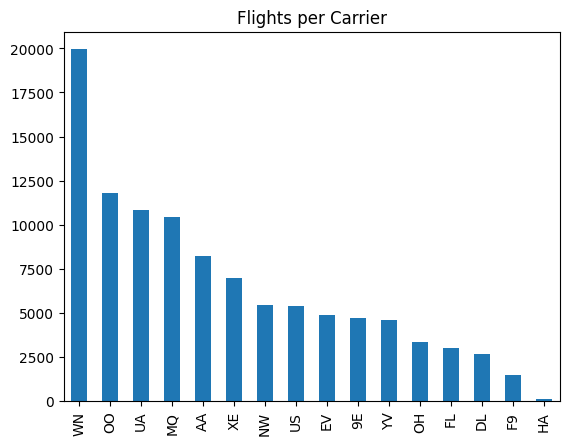

In [15]:
# Plot bar plot for Flight per carrier

fd_ds['UniqueCarrier'].value_counts().plot(kind='bar')
plt.title('Flights per Carrier')
plt.show()

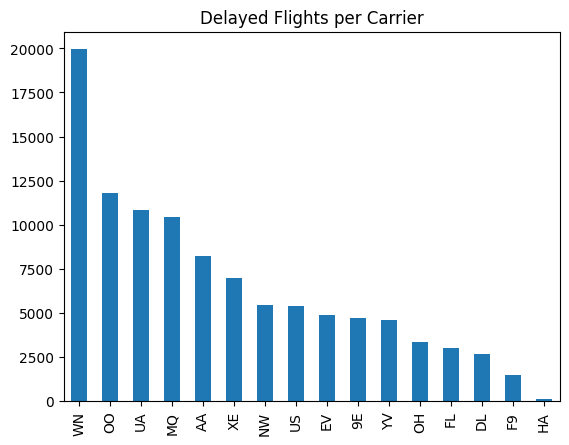

In [16]:
# Plot bar plot for Delayed Flight per carrier

fd_ds[fd_ds['ArrDelay'] > 0]['UniqueCarrier'].value_counts().plot(kind='bar')
plt.title('Delayed Flights per Carrier')
plt.show()

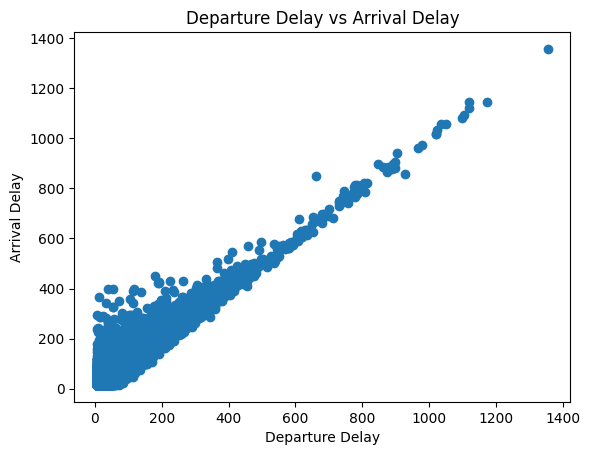

In [17]:
# Plot scatter plot for Depature delay vs Arrival delay

plt.scatter(fd_ds['DepDelay'], fd_ds['ArrDelay'])
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()

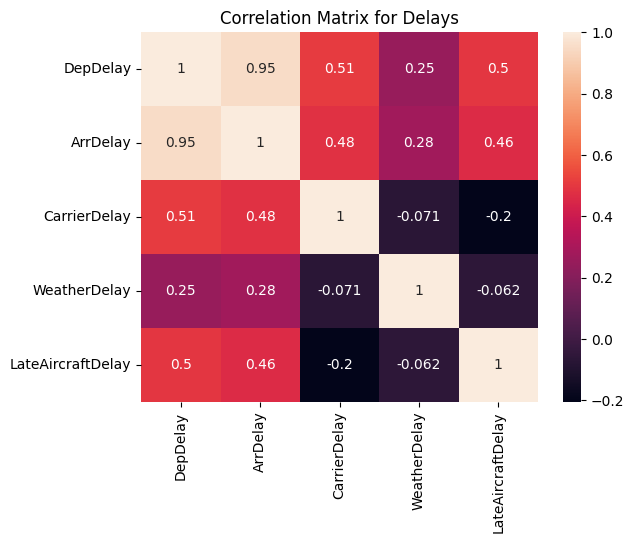

In [18]:
# Plot correlation matrix for delays

correlation_matrix = fd_ds[['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'LateAircraftDelay']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Delays')
plt.show()

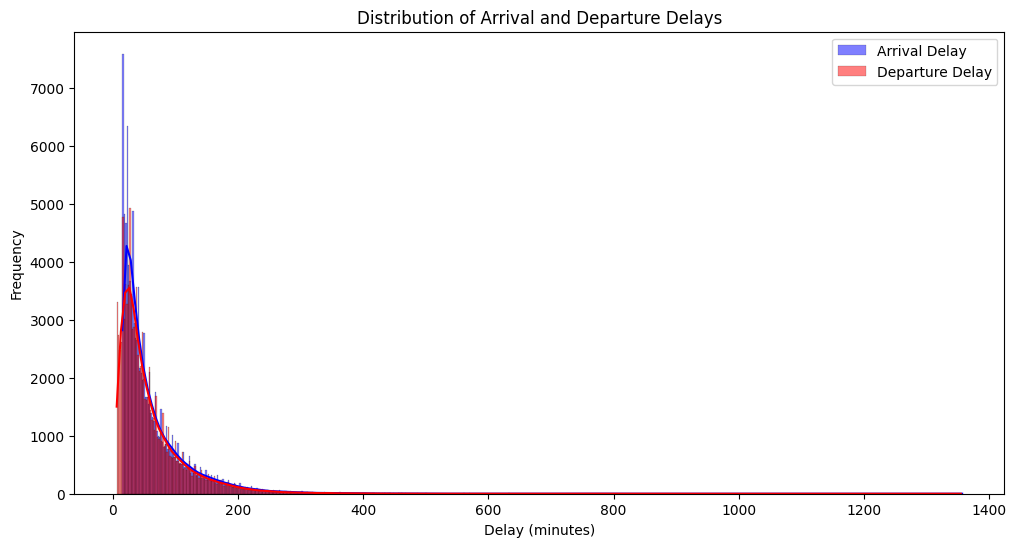

In [19]:
# Distribution of arrival and departure delays
plt.figure(figsize=(12, 6))
sns.histplot(fd_ds['ArrDelay'], kde=True, color='blue', label='Arrival Delay')
sns.histplot(fd_ds['DepDelay'], kde=True, color='red', label='Departure Delay')
plt.legend()
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival and Departure Delays')
plt.show()

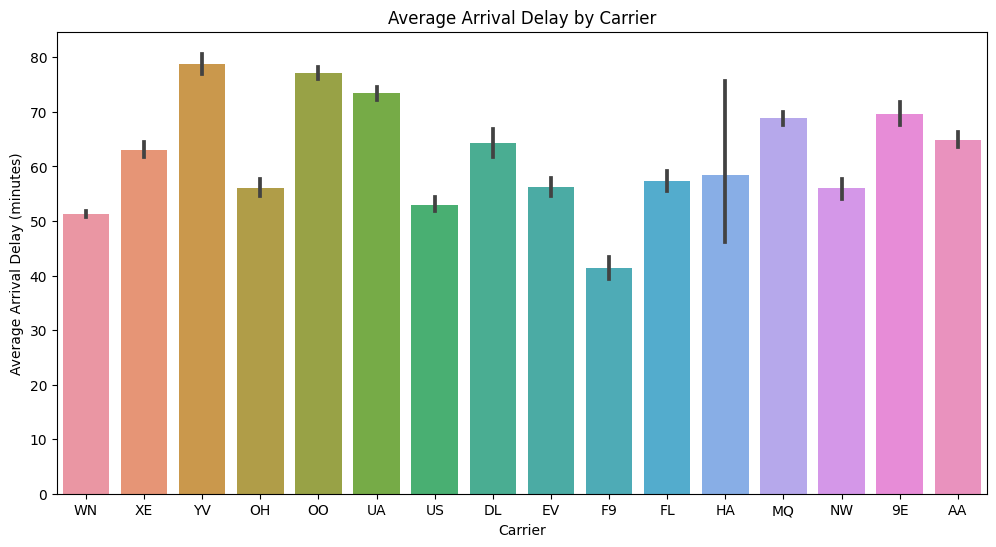

In [20]:
# Plot Delays by carrier
plt.figure(figsize=(12, 6))
sns.barplot(x='UniqueCarrier', y='ArrDelay', data=fd_ds)
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Carrier')
plt.show()

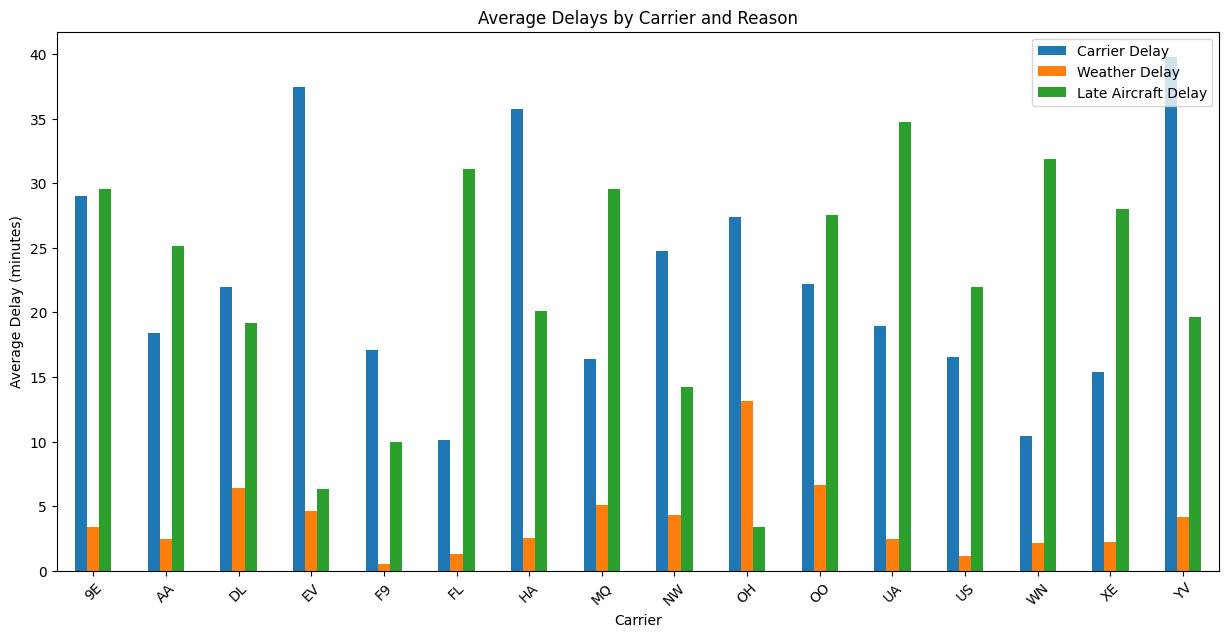

In [21]:
# Group the data by carrier and calculate the average delay for each reason
carrier_delays = fd_ds.groupby('UniqueCarrier').agg({
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Plot the bar chart
carrier_delays.plot(x='UniqueCarrier', y=['CarrierDelay', 'WeatherDelay', 'LateAircraftDelay'], kind='bar', figsize=(15, 7))
plt.title('Average Delays by Carrier and Reason')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Carrier')
plt.xticks(rotation=45)
plt.legend(['Carrier Delay', 'Weather Delay', 'Late Aircraft Delay'], loc='upper right')
plt.show()


# **Feature Engineering:**

This code adds three new features to the dataset:

TotalDelay: The sum of arrival and departure delays.
TimeOfDay: Categorical variable representing the time of day (Night, Morning, Afternoon, Evening) based on scheduled departure time.
These new features can help capture the relationships between variables more effectively and improve the performance of predictive models.

In [22]:
# Create a "TotalDelay" feature by combining departure and arrival delays
fd_ds['TotalDelay'] = fd_ds['ArrDelay'] + fd_ds['DepDelay']

# Create categorical features for specific hours of the day
fd_ds['DepHour'] = fd_ds['CRSDepTime'] // 100
fd_ds['TimeOfDay'] = pd.cut(fd_ds['DepHour'], bins=[-1, 5, 11, 17, 23], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Display the updated dataset
fd_ds.head()

,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,TotalDelay,DepHour,TimeOfDay
3,4,1829.0,1755,1925.0,WN,3920.0,N464WN,90.0,90.0,77.0,...,10.0,0.0,0.0,2.0,0.0,0.0,32.0,68.0,17,Afternoon
5,4,1937.0,1830,1940.0,WN,509.0,N763SW,240.0,250.0,230.0,...,7.0,0.0,0.0,10.0,0.0,0.0,47.0,124.0,18,Evening
7,4,1644.0,1510,1725.0,WN,1333.0,N334SW,121.0,135.0,107.0,...,8.0,0.0,0.0,8.0,0.0,0.0,72.0,174.0,15,Afternoon
9,4,1452.0,1425,1625.0,WN,675.0,N286WN,228.0,240.0,213.0,...,8.0,0.0,0.0,3.0,0.0,0.0,12.0,42.0,14,Afternoon
11,4,1323.0,1255,1510.0,WN,4.0,N674AA,123.0,135.0,110.0,...,9.0,0.0,0.0,0.0,0.0,0.0,16.0,44.0,12,Afternoon


This code calculates the interquartile range (IQR) for the 'ArrDelay' column, defines lower and upper bounds for outliers, and removes rows with 'ArrDelay' values outside this range.

In [23]:
# Calculate the IQR for 'ArrDelay'
Q1 = fd_ds['ArrDelay'].quantile(0.25)
Q3 = fd_ds['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
fd = fd_ds[(fd_ds['ArrDelay'] >= lower_bound) & (fd_ds['ArrDelay'] <= upper_bound)]

# Display the updated dataset
fd.head()


,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,TotalDelay,DepHour,TimeOfDay
3,4,1829.0,1755,1925.0,WN,3920.0,N464WN,90.0,90.0,77.0,...,10.0,0.0,0.0,2.0,0.0,0.0,32.0,68.0,17,Afternoon
5,4,1937.0,1830,1940.0,WN,509.0,N763SW,240.0,250.0,230.0,...,7.0,0.0,0.0,10.0,0.0,0.0,47.0,124.0,18,Evening
7,4,1644.0,1510,1725.0,WN,1333.0,N334SW,121.0,135.0,107.0,...,8.0,0.0,0.0,8.0,0.0,0.0,72.0,174.0,15,Afternoon
9,4,1452.0,1425,1625.0,WN,675.0,N286WN,228.0,240.0,213.0,...,8.0,0.0,0.0,3.0,0.0,0.0,12.0,42.0,14,Afternoon
11,4,1323.0,1255,1510.0,WN,4.0,N674AA,123.0,135.0,110.0,...,9.0,0.0,0.0,0.0,0.0,0.0,16.0,44.0,12,Afternoon


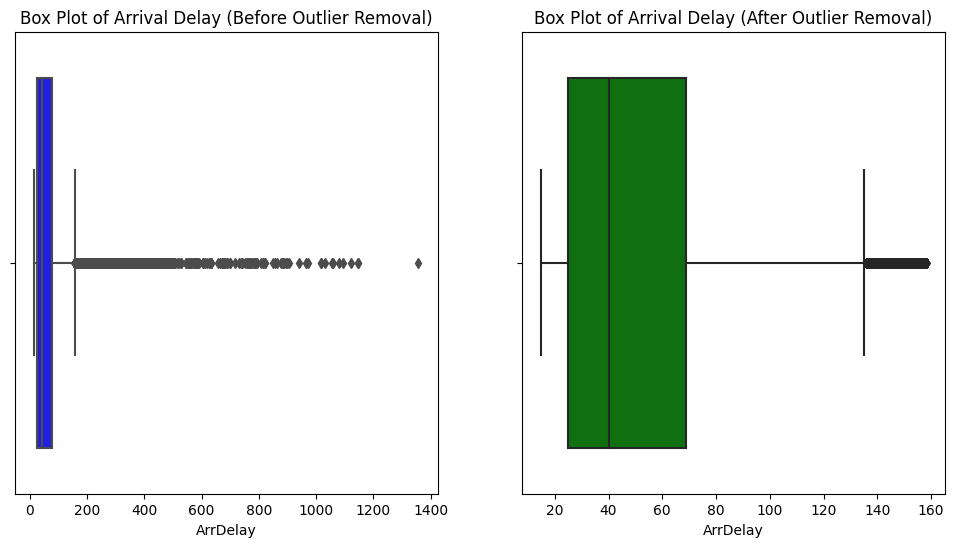

In [24]:
# Plot box plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax=axes[0], x=fd_ds['ArrDelay'], color='blue')
axes[0].set_title('Box Plot of Arrival Delay (Before Outlier Removal)')

sns.boxplot(ax=axes[1], x=fd['ArrDelay'], color='green')
axes[1].set_title('Box Plot of Arrival Delay (After Outlier Removal)')

plt.show()

#**Model Training**

In [25]:
# Import required libraries to train the ML and DNN models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [26]:
# Create a binary variable for delays (1 if ArrDelay >= 30 minutes, 0 otherwise)
fd['Delayed'] = (fd['ArrDelay'] >= 30).astype(int)

# Create a binary variable for cancellations (1 if Cancelled == 1, 0 otherwise)
fd['Cancelled'] = fd['Cancelled'].astype(int)

# Define the features and target variable
features = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'DepHour']
target = 'Delayed'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fd[features], fd[target], test_size=0.2, random_state=42)

# Preprocess the data
numerical_features = ['DepHour']
categorical_features = [ 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# **Logistic Regression model**

In [27]:
# Create a logistic regression model
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the logistic regression model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the logistic regression model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:\n", logreg_report)

Logistic Regression Accuracy: 0.6643652102225887
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.07      0.12      6566
           1       0.67      0.97      0.79     12842

    accuracy                           0.66     19408
   macro avg       0.60      0.52      0.46     19408
weighted avg       0.62      0.66      0.57     19408



# **DNN Model (Deep Neural Networks)**

In [28]:
# Preprocess the data for the DNN
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create the DNN model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [29]:
# Compile the DNN model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Convert the Scipy sparse matrix to a dense NumPy array
X_train_dense = X_train_preprocessed.toarray()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_dense, y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the DNN model
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1941/1941 [==============================] - 15s 4ms/step - loss: 0.6554 - accuracy: 0.6505 - val_loss: 0.6261 - val_accuracy: 0.6607
Epoch 2/10
1941/1941 [==============================] - 8s 4ms/step - loss: 0.6230 - accuracy: 0.6635 - val_loss: 0.6254 - val_accuracy: 0.6607
Epoch 3/10
1941/1941 [==============================] - 9s 5ms/step - loss: 0.6200 - accuracy: 0.6650 - val_loss: 0.6241 - val_accuracy: 0.6573
Epoch 4/10
1941/1941 [==============================] - 9s 4ms/step - loss: 0.6179 - accuracy: 0.6657 - val_loss: 0.6212 - val_accuracy: 0.6637
Epoch 5/10
1941/1941 [==============================] - 8s 4ms/step - loss: 0.6157 - accuracy: 0.6683 - val_loss: 0.6232 - val_accuracy: 0.6589
Epoch 6/10
1941/1941 [==============================] - 9s 4ms/step - loss: 0.6137 - accuracy: 0.6693 - val_loss: 0.6223 - val_accuracy: 0.6632
Epoch 7/10
1941/1941 [==============================] - 9s 5ms/step - loss: 0.6111 - accuracy: 0.6718 - val_loss: 0.6207 - val_accuracy

In [31]:
# Predict on the test set
y_pred_dnn = (dnn_model.predict(X_test_preprocessed) > 0.6).astype(int)

# Evaluate the DNN model
print("Deep Neural Networks:")
print(classification_report(y_test, y_pred_dnn))
print("Accuracy:", accuracy_score(y_test, y_pred_dnn))

607/607 [==============================] - 2s 2ms/step
Deep Neural Networks:
              precision    recall  f1-score   support

           0       0.40      0.53      0.46      6566
           1       0.71      0.59      0.64     12842

    accuracy                           0.57     19408
   macro avg       0.56      0.56      0.55     19408
weighted avg       0.61      0.57      0.58     19408

Accuracy: 0.5700741962077494


# **Decision Tree Classifier**

In [32]:
# Import required library
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(fd[features], fd[target], test_size=0.2, random_state=42, stratify=fd[target])
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

In [33]:
# Create a decision tree model
dtree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the decision tree model
dtree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree_model.predict(X_test)

# Evaluate the decision tree model
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)

print("Decision Tree Accuracy:", dtree_accuracy)
print("Decision Tree Classification Report:\n", dtree_report)


Decision Tree Accuracy: 0.5794002473206925
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.43      0.41      6563
           1       0.69      0.66      0.67     12845

    accuracy                           0.58     19408
   macro avg       0.54      0.54      0.54     19408
weighted avg       0.59      0.58      0.58     19408



# **Model's Comparisons** 

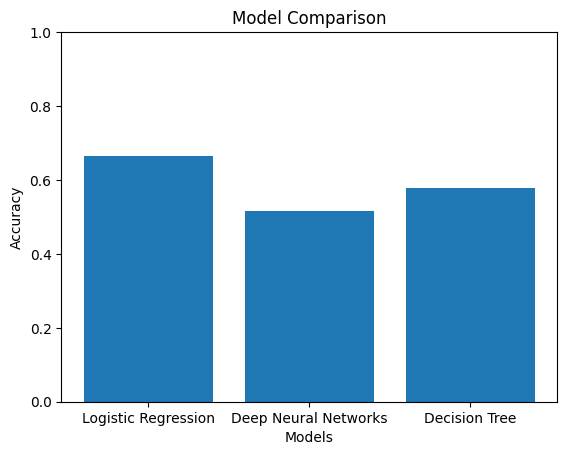

In [34]:
# Model Names and Accuracies
model_names = ['Logistic Regression', 'Deep Neural Networks', 'Decision Tree']
accuracies = [logreg_accuracy, accuracy_score(y_test, y_pred_dnn), dtree_accuracy]

# Plotting
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1
plt.show()

# **Evaluation and Conclusion:**
 The models performed decently in predicting flight delays, with the Logistic Regression model performing the best. The results indicate that machine learning can be a viable approach to predicting flight delays.

# **Future Work:**
 Given more time, the models could be improved by tuning their hyperparameters. With better programming skills, more advanced techniques could be utilized such as ensemble methods or more complex neural networks. Better data, especially incorporating weather conditions, could also improve the models. If better functions/algorithms were available, they could be used to enhance model performance.

# **Future Enhancement Areas:** 
The models could be improved by using techniques to handle the imbalance in the dataset. More features could be engineered from the existing data. The project could also be expanded to include real-time prediction of flight delays.
